In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten , BatchNormalization
from keras.layers import Conv2D, MaxPooling2D , AveragePooling2D,GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [3]:
train="../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train"
val='../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/validation'
batch_size=32
IMAGE_SIZE = [150, 150]

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    seed=123,
    shuffle=True,
    image_size=(150,150),
    batch_size=batch_size
)

Found 8404 files belonging to 25 classes.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    seed=123,
    shuffle=True,
    image_size=(150,150),
    batch_size=batch_size
)

Found 935 files belonging to 25 classes.


In [8]:
class_names=dataset.class_names

**Visualisation of some pictures in a batch**

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

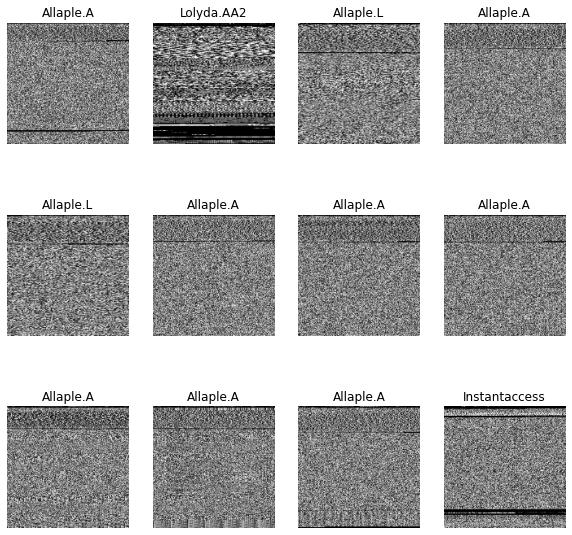

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# Splitting Data to train and test

In [10]:
def get_dataset_partitions_tf(ds, train_split=0.9, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    test_size = int(test_split * ds_size)
    
    train_ds = ds.take(train_size)    
    test_ds = ds.skip(train_size).take(test_size)
    
    
    return train_ds, test_ds

In [12]:
train_ds, test_ds = get_dataset_partitions_tf(dataset)

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
def malware_model(width , height):
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(batch_size, width, height, 3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    
    Malware_model.add(Dense(25, activation='softmax'))
    Malware_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

#  **Without Scaling Model**

In [18]:
model=malware_model(150 , 150)

ValueError: Input 0 of layer max_pooling2d_2 is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, 32, 148, 148, 30)

In [19]:
model_fit = model.fit(train_ds, epochs=20 ,batch_size = batch_size ,validation_data=val_ds, verbose =1)

NameError: name 'model' is not defined

In [ ]:
model.evaluate(test_ds)

In [ ]:
# plot the loss
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.jpg',format='jpg')

plt.close()
# plot the accuracy
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.jpg',format="jpg")

plt.close()

# ****Saving the Model****

In [ ]:
model.save("./Malimg_model.h5")

# ****Model with Scaling****

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(150, 150),
  layers.experimental.preprocessing.Rescaling(1./255)
])

In [ ]:
def malware_model(width , height):
    Malware_model = Sequential()
    
    Malware_model.add(resize_and_rescale)
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape = (batch_size, width, height, 3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    
    Malware_model.add(Dense(25, activation='softmax'))
    Malware_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [ ]:
EPOCH = 100

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=4, verbose=1,  factor=0.4, min_lr=0.0001)

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.00001, patience=8, mode='auto', restore_best_weights=True)

In [ ]:
model=malware_model(150 , 150)
model_fit = model.fit(train_ds, epochs=EPOCH ,batch_size = batch_size ,validation_data=val_ds, verbose =1,callbacks=[early_stop,lr_reduction])

In [ ]:
model.evaluate(test_ds)

In [ ]:
model.save("./Best_Model.h5")

In [ ]:
# plot the loss
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()


plt.close()
# plot the accuracy
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


plt.close()

#  **Without Scaling Is The Best Model**

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in tt.take(3):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
model.summary()

In [ ]:
from keras.models import load_model
model=load_model("./Best_Model.h5")

Predicting a random image

In [ ]:
from keras.preprocessing import image
img_path="../input/malimg-dataset9010/validation_ds_update_924/validation_ds_update_924/malimg_dataset/validation/Malex.gen!J/003b0b71bc2a10909291f93e07e39399.png"
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
                                      # imshow expects values in the range [0, 1]

pred=model.predict(img_tensor)
print(class_names[np.argmax(pred)])